# import modules

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# import train and test dataset

In [2]:
train_csv_file_path = './data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
train_raw_data = pd.read_csv(train_csv_file_path)

test_csv_file_path = './data/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
test_raw_data = pd.read_csv(test_csv_file_path)

In [3]:
train_data = train_raw_data.iloc[0:, :-1]
train_label = train_raw_data.iloc[0:, -1]

test_data = test_raw_data.iloc[0:, :-1]
test_label = test_raw_data.iloc[0:, -1]

# Random Forest

In [4]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=23)

In [5]:
random_forest_clf.fit(train_data, train_label)

# takes [25]secs in m1 mac

RandomForestClassifier(random_state=23)

# prediction

In [6]:
prediction = random_forest_clf.predict(test_data)

# evaluate

In [7]:
accuracy = accuracy_score(test_label, prediction)
print(accuracy)

0.991800918626174


# Traffics that are evaluated as BenignTraffics

In [8]:
indices_unknown = np.where(prediction == "BenignTraffic")[0]

In [9]:
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
test_unknown_data = test_data.iloc[indices_unknown]
test_unknown_label = test_label.iloc[indices_unknown]

In [15]:
tmp = test_unknown_label.value_counts()
print(tmp)

label
BenignTraffic              5110
MITM-ArpSpoofing            210
Recon-OSScan                182
DNS_Spoofing                162
Recon-PortScan              137
Recon-HostDiscovery          93
DictionaryBruteForce         26
SqlInjection                 18
BrowserHijacking              7
CommandInjection              7
DDoS-UDP_Flood                4
XSS                           4
DoS-UDP_Flood                 4
DDoS-ICMP_Fragmentation       3
VulnerabilityScan             3
Recon-PingSweep               3
Backdoor_Malware              3
DDoS-SlowLoris                2
DDoS-RSTFINFlood              2
DDoS-SynonymousIP_Flood       2
Mirai-greeth_flood            2
DDoS-UDP_Fragmentation        2
DDoS-ICMP_Flood               1
Mirai-greip_flood             1
DoS-TCP_Flood                 1
Mirai-udpplain                1
Name: count, dtype: int64


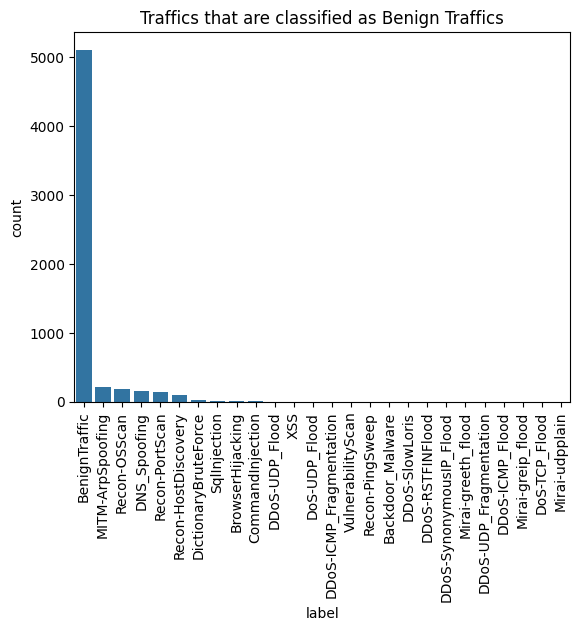

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = pd.DataFrame(tmp)
sns.barplot(x="label", y="count", data=tmp)
plt.title("Traffics that are classified as Benign Traffics")
plt.xticks(rotation='vertical')
# plt.figure(figsize=(1000,10))
plt.show()

# Export the unknown data

In [12]:
print(type(test_unknown_data))
print(type(test_unknown_label))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
test_unknown_data.to_csv('./data/1_rf_test_unknown_data.csv', index=False)
test_unknown_label.to_csv('./data/1_rf_test_unknown_label.csv', index=False)